In [49]:
#check the version of the libraries

# Python
import sys
print('Python: {}'.format(sys.version))

#Scipy
import scipy
print('Scipy: {}'.format(scipy.__version__))

#numpy
import numpy
print('numpy: {}'.format(numpy.__version__))

#matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

#pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

#scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Scipy: 1.3.1
numpy: 1.16.4
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.22.2


In [50]:
# Load libraries

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [51]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

# Using pandas to load the data
dataset = pandas.read_csv( url, names=names)

In [52]:
# Total number of rows and colums of the given dataset. Output will be (rows, colums)

print(dataset.shape)

(150, 5)


In [53]:
# To print the first thirty instances

print(dataset.head(30))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [54]:
# To print the last 30 instances

print(dataset.tail(30))

     sepal-length  sepal-width  petal-length  petal-width           class
120           6.9          3.2           5.7          2.3  Iris-virginica
121           5.6          2.8           4.9          2.0  Iris-virginica
122           7.7          2.8           6.7          2.0  Iris-virginica
123           6.3          2.7           4.9          1.8  Iris-virginica
124           6.7          3.3           5.7          2.1  Iris-virginica
125           7.2          3.2           6.0          1.8  Iris-virginica
126           6.2          2.8           4.8          1.8  Iris-virginica
127           6.1          3.0           4.9          1.8  Iris-virginica
128           6.4          2.8           5.6          2.1  Iris-virginica
129           7.2          3.0           5.8          1.6  Iris-virginica
130           7.4          2.8           6.1          1.9  Iris-virginica
131           7.9          3.8           6.4          2.0  Iris-virginica
132           6.4          2.8        

In [55]:
# Print all the related information of the dataset

print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [56]:
# I can access them by each column

print(dataset['sepal-length'].mean())

5.843333333333335


In [57]:
# Number of instances for each class

print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


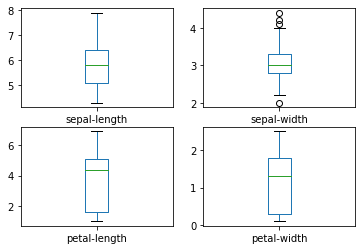

In [59]:
# Visualization using plotting
# Univariate visulization


dataset.plot(kind= 'box', subplots = True, layout = (2, 2), sharex = False, sharey = False)

## If we had used (4, 4) instead of (2, 2) then the plot would be shown in one row
## Why are we using sharex and sharey?
## -> If they are true, they will give us a cluttered visualization. Using the value of 
## x and y, they are showing how the values are scattered within a specific limit


plt.show()

In [ ]:
# To show the histogram of each portion of data

dataset.hist()
plt.show()


In [ ]:
# Multivariate visualization

scatter_matrix(dataset)
plt.show()

In [ ]:
# Evaluate some algorithm and estimate accuracy based on some unseen data

# Create a validation dataset
## Why do we need a validation dataset?
## -> To know the model we created is good

# Split the data so that we can use a part to train the model, another part will be for validation

In [ ]:
#Splitting the dataset

array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]

validation_size = 0.20  # To use 20% of total data as validation data
seed = 6   # We use seed to randomize the data for train and validation. To keep the same randomness


## We will select the model based on the following method

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [ ]:
seed = 6
scoring = 'accuracy'  # Metric of accuracy to train the model

In [65]:
# Building the model
# Spot check algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))


# Evaluate each model in turn

results = []
names = []


## The data will divided into 10 parts( 10 fold cross validation)
## for each iteration. And then one part will be used for validation, the other nine
## parts will be used for training. That's the the model will be trained.
## Then the information will be saved in models[] array for each algorithm.

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

LR: 0.950000 (0.076376)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.055902)
CART: 0.933333 (0.072648)
NB: 0.966667 (0.055277)
SVM: 0.950000 (0.076376)


C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:296: Futu